In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import os

In [2]:
#Path of the file with the data of particles
os.chdir('X:\OLIVER\Mingo\Corsika')

In [3]:
#File with summary of Showers
Showers = pd.read_csv('DAT000001_showers.txt',delimiter='\t')

In [4]:
#File with information of all particles at observation level
Particles = pd.read_csv('DAT000001_particles.txt',delimiter='\t')

In [5]:
#Change the arrival angles of primary particle from radians to degrees
Showers[['Theta','Phi']] = Showers[['Theta','Phi']].mul(180/np.pi)
Particles[['zha','aza']] = Particles[['zha','aza']].mul(180/np.pi)

In [6]:
#Change the units of first interaction point from cm to km
Showers['Zfirst'] = Showers['Zfirst'].mul(1e-5)

In [7]:
#change units of positions from cm to mm
Particles[['x','y']] = Particles[['x','y']].mul(10)

In [8]:
#Statistics of the data frame with summary of showers 
Showers.describe()

,Shower,Energy,Zfirst,Theta,Phi,Particles
count,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000
mean,50041.143642,44.408688,20.359542,16.636941,0.785264,2.003717
std,28822.156816,60.798331,8.104843,6.164542,103.651864,2.905540
min,1.000000,10.000500,0.881543,0.168640,-179.998702,1.000000
25%,25127.000000,16.749800,14.789100,12.123959,-89.433555,1.000000
50%,50205.000000,26.684500,19.016600,17.481916,2.132492,1.000000
75%,74818.000000,47.223200,24.324000,21.845276,90.408729,2.000000
max,99991.000000,995.666000,83.357900,25.798914,179.984951,92.000000


In [43]:
#Add a new column which will contain the number of cluster for each particle
Particles['Ncluster'] = 0

In [44]:
#Statistics of the data frame with information of all particles at observation level
Particles.describe()

,sh,id,x,y,t,px,py,pz,Psq,ek,zha,aza,Ncluster
count,48516.000000,48516.000000,4.851600e+04,4.851600e+04,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.0
mean,49949.510594,4.795531,-5.234866e+03,-4.949241e+04,68294.967189,-0.005842,0.003196,3.004671,47.431998,3.066898,18.064516,0.920590,0.0
std,28615.108906,2.419550,1.246195e+06,1.311730e+06,29163.269263,1.512797,1.444174,5.833566,466.765045,6.109119,8.327504,103.959290,0.0
min,1.000000,1.000000,-1.693070e+07,-1.392240e+07,2229.760000,-52.374400,-42.571500,0.015236,0.002500,0.050002,0.082593,-179.993545,0.0
25%,25144.000000,5.000000,-5.221105e+05,-6.039605e+05,48523.650000,-0.201650,-0.199549,0.360151,0.152504,0.320861,12.330052,-90.004078,0.0
50%,50128.000000,5.000000,-1.292675e+03,-2.450550e+04,63523.450000,-0.000359,0.001139,1.339020,2.026450,1.286405,17.825261,1.770202,0.0
75%,74265.000000,6.000000,5.300212e+05,5.093858e+05,82487.725000,0.196965,0.204074,3.370825,12.573525,3.431262,23.040266,90.664412,0.0
max,99991.000000,14.000000,1.438420e+07,1.435280e+07,284052.000000,68.716800,42.219500,160.755000,28619.900000,169.069000,86.032478,179.980367,0.0


In [11]:
%%time
#Check for those showers which generate just one particle at observation level
Sh_N1 =  Showers[Showers['Particles']==1]
#For these showers we add a label corresponding to the number of cluster which contain that particle
for i in range(len(Sh_N1)):
    Particles.loc[Particles['sh']==Sh_N1['Shower'].iloc[i],'Ncluster'] = i

CPU times: total: 5.64 s
Wall time: 6.21 s


In [12]:
#Statistics of the data frame of all particles at observation level
Particles.describe()
#Particles['Ncluster'].max()

,sh,id,x,y,t,px,py,pz,Psq,ek,zha,aza,Ncluster
count,48516.000000,48516.000000,4.851600e+04,4.851600e+04,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000,48516.000000
mean,49949.510594,4.795531,-5.234866e+03,-4.949241e+04,68294.967189,-0.005842,0.003196,3.004671,47.431998,3.066898,18.064516,0.920590,2622.992023
std,28615.108906,2.419550,1.246195e+06,1.311730e+06,29163.269263,1.512797,1.444174,5.833566,466.765045,6.109119,8.327504,103.959290,4584.497234
min,1.000000,1.000000,-1.693070e+07,-1.392240e+07,2229.760000,-52.374400,-42.571500,0.015236,0.002500,0.050002,0.082593,-179.993545,0.000000
25%,25144.000000,5.000000,-5.221105e+05,-6.039605e+05,48523.650000,-0.201650,-0.199549,0.360151,0.152504,0.320861,12.330052,-90.004078,0.000000
50%,50128.000000,5.000000,-1.292675e+03,-2.450550e+04,63523.450000,-0.000359,0.001139,1.339020,2.026450,1.286405,17.825261,1.770202,0.000000
75%,74265.000000,6.000000,5.300212e+05,5.093858e+05,82487.725000,0.196965,0.204074,3.370825,12.573525,3.431262,23.040266,90.664412,3824.250000
max,99991.000000,14.000000,1.438420e+07,1.435280e+07,284052.000000,68.716800,42.219500,160.755000,28619.900000,169.069000,86.032478,179.980367,15953.000000


In [13]:
#Definition of a box which contain all the particles of the simulation
#size of the detector on mm (¡¡¡For the moment work with a detector of 1m^2 !!!)
det_s_x = 1000
det_s_y = 1000

#Find the coordinates on X and Y axis for those particles farthest of the core
#and add 10 mm to "expand" the borders of the box, then convert to km 
#and round to the next integer (for negative values by below and positive by above)
#left side
ll_x = math.floor((Particles.min()['x'] - 10)*1e-6)
#rigth side
lr_x = math.ceil((Particles.max()['x'] + 10)*1e-6)
#down side
ld_y = math.floor((Particles.min()['y'] - 10)*1e-6)
#up side
lu_y = math.ceil((Particles.max()['y'] + 10)*1e-6)

#Check the length of the box on X and Y, because they are integers lower than 100
#these values will be use for the finer meshing (Check some cells below to see the implementation)
Lx = lr_x - ll_x
Ly = lu_y - ld_y

#Finally return to mm the coordinates of the sides
ll_x = ll_x*1e6; lr_x = lr_x*1e6
ld_y = ld_y*1e6; lu_y = lu_y*1e6

#The lengths are of km
Lx, Ly

(32, 29)

In [14]:
#Define a class to make a mesh for the box which contains the particles
#It should be initialized by providing the sides of the box
#left, right, down and up
class mesh:
    def __init__(self,x1,x2,y1,y2):
        self.x1, self.x2, self.y1, self.y2 = x1, x2, y1, y2

    #The method boxes create two arrays with the coordinates on X and Y axis
    #of the corners of the cells in which will be divided the original box
    #By default is divided by 10 x 10 cells and modified for the finer meshing when needed 
    def boxes(self,Nx=10,Ny=10):
        Lx = self.x2 - self.x1
        Ly = self.y2 - self.y1

        nx = int(Lx/det_s_x)
        ny = int(Ly/det_s_y)
        
        if (nx % Nx) != 0:
            Nx = nx
        if (ny % Ny) != 0:
            Ny = ny
        print(Nx,Ny)    
        X = np.linspace(self.x1,self.x2,Nx+1)
        Y = np.linspace(self.y1,self.y2,Ny+1)
        return X, Y

10 10


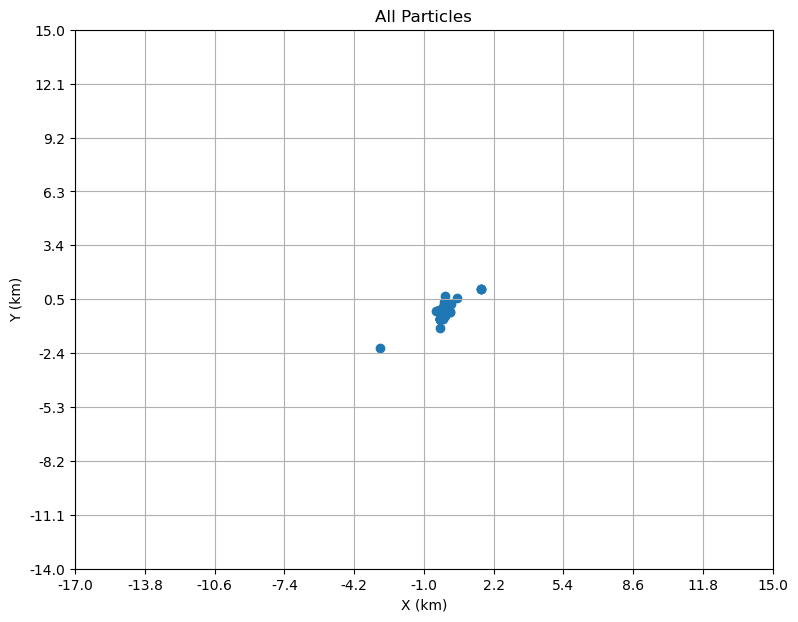

In [15]:
#Create the first level of meshing
M = mesh(ll_x,lr_x,ld_y,lu_y).boxes()

#check for an specific event
Sh_max_par = Particles[Particles['sh']==35983]
Sh1 = Particles[Particles['sh']==1]

#plot data for a fixed size window
fig, ax = plt.subplots(figsize=(9, 7))
#plt.scatter(x='x', y='y', data=Particles)
ax.scatter(x='x', y='y', data=Sh_max_par)
#plt.scatter(x='x', y='y', data=Sh1)

#define the axis ticks and location, labels and title
x_ticks = np.linspace(int(M[0][0]*1e-6),int(M[0][-1]*1e-6),11)
y_ticks = np.linspace(int(M[1][0]*1e-6),int(M[1][-1]*1e-6),11)
x_ticks = ['%.1f'%x for x in x_ticks]
y_ticks = ['%.1f'%y for y in y_ticks]
ax.set_xticks(M[0])
ax.set_yticks(M[1])
ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)
ax.axis([ll_x,lr_x,ld_y,lu_y])
ax.set_title('All Particles')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.grid()

In [16]:
#Define a function to find the clusters of particles
def clusters(Shower_Num,cells_x,cells_y):
    #shower to analyze
    Sh_n =  Particles[Particles['sh']==Shower_Num]
    #current number of cluster
    Nclus = Particles['Ncluster'].max()
    
    #Auxiliary arrays to save the new points of the borders of the new boxes to refine by meshing
    X_lv1 = []
    Y_lv1 = []
    
    #check if the column of number of cluster still have particles to check
    if len(Sh_n[Sh_n['Ncluster'] == 0].index) == 0:
        return X_lv1, Y_lv1

    #cicles over the cells in X and Y
    for i in range(1,len(cells_x)):
        for j in range(1,len(cells_y)):
            #check for the particles with coordinates inside the cell
            S = Sh_n.loc[(Sh_n['Ncluster'] == 0) & (Sh_n['x'] > cells_x[i-1]) & (Sh_n['x'] < cells_x[i]) \
                & (Sh_n['y'] > cells_y[j-1]) & (Sh_n['y'] < cells_y[j])]

            #if there is just one particle inside the cell it is added a label for the number of cluster 
            if len(S) == 1:
                Particles.loc[S.index,'Ncluster'] = Nclus + 1
                Nclus = Nclus + 1
            
            #if there are two particles inside the cell, we compare that the distance between them
            #is lower than the diagonal of the detector, if yes we add the same label of number of cluster
            #if not we add different labels
            if len(S) == 2:
                if math.sqrt((S['x'].iloc[1]-S['x'].iloc[0])**2 + (S['y'].iloc[1]-S['y'].iloc[0])**2) \
                    < math.sqrt(det_s_x**2 + det_s_y**2):
                    Particles.loc[S.index[0],'Ncluster'] = Nclus + 1
                    Particles.loc[S.index[1],'Ncluster'] = Nclus + 1
                    Nclus = Nclus + 1
                else:
                    Particles.loc[S.index[0],'Ncluster'] = Nclus + 1
                    Particles.loc[S.index[1],'Ncluster'] = Nclus + 2
                    Nclus = Nclus + 2
        
            #if there are more than three particles inside the cell, we check if the size of the cell is
            #the detector size and add a label, if not we save the coordinates of the cell for a further
            #meshing
            if len(S) >= 3:
                if abs(cells_x[i-1] - cells_x[i]) == det_s_x and abs(cells_y[j-1] - cells_y[j]) == det_s_y:
                    Particles.loc[S.index,'Ncluster'] = Nclus + 1
                    Nclus = Nclus + 1
                else:
                    X_lv1 = np.append(X_lv1, [cells_x[i-1],cells_x[i]])
                    Y_lv1 = np.append(Y_lv1, [cells_y[j-1],cells_y[j]])
                print(len(S))
    return X_lv1, Y_lv1

In [50]:
%%time
#implementation of levels of meshing to find the clusters 
#the original size of the box is of the order of tens of kilometers
Shower_Num = 35983
#first meshing (cells of the order of kilometers)
M = mesh(ll_x,lr_x,ld_y,lu_y).boxes()
A = clusters(Shower_Num,M[0],M[1])

#Do cicles of meshing for the cells which contains particles until find their clusters
for i in range(1,len(A[0])):
    #second level of meshing (cells of the order of hundreds of meters)
    Msh = mesh(A[0][i-1],A[0][i],A[1][i-1],A[1][i]).boxes()
    B = clusters(Shower_Num,Msh[0],Msh[1])
    if len(B) != 0:
        for j in range(1,len(B[0])):
            #third level of meshing (cells of the order of tens of meters)
            mesh2 =  mesh(B[0][j-1],B[0][j],B[1][j-1],B[1][j]).boxes()
            C = clusters(Shower_Num,mesh2[0],mesh2[1])
            if len(C) !=0:
                for k in range(1,len(C[0])):
                    #fourth level of meshing (cells of the order of meters)
                    mesh3 = mesh(C[0][k-1],C[0][k],C[1][k-1],C[1][k]).boxes()
                    D = clusters(Shower_Num,mesh3[0],mesh3[1])

10 10
CPU times: total: 0 ns
Wall time: 3.13 ms


In [51]:
#Just to check that the column of Ncluster is filling with information
Z = Particles[Particles['sh']==35983]
Z[Z['Ncluster']!=0]

,sh,id,x,y,t,px,py,pz,Psq,ek,zha,aza,Ncluster
17677,35983,3,-115652.0,97695.5,133065.0,0.023479,0.077230,0.162361,0.032877,0.180809,26.435127,73.089934,26
17678,35983,2,-115661.0,97693.4,133065.0,0.031798,0.119107,0.254953,0.080199,0.282683,25.805332,75.052315,26
17679,35983,2,-145844.0,41990.2,132986.0,0.012504,0.025048,0.059302,0.004300,0.065069,25.270877,63.471119,25
17680,35983,6,-125565.0,-573993.0,132593.0,0.061612,0.017986,0.601089,0.365428,0.508012,6.094896,16.273548,6
17681,35983,6,-13659.2,-156494.0,132857.0,0.118851,0.006952,0.395568,0.170648,0.320735,16.750192,3.347483,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17764,35983,5,-325160.0,-95508.7,132704.0,1.102050,2.351040,6.963520,55.232500,7.326950,20.449207,64.885178,16
17765,35983,5,-3002580.0,-2105620.0,129427.0,0.282264,0.911543,3.189360,11.082600,3.225080,16.656972,72.794861,1
17766,35983,1,1638360.0,1063800.0,135282.0,0.020483,0.033841,0.084767,0.008750,0.093542,25.016369,58.814118,85
17767,35983,1,1638350.0,1063800.0,135282.0,0.095280,0.157442,0.394558,0.189542,0.435364,25.005139,58.818701,85


Text(0, 0.5, 'Number of particles')

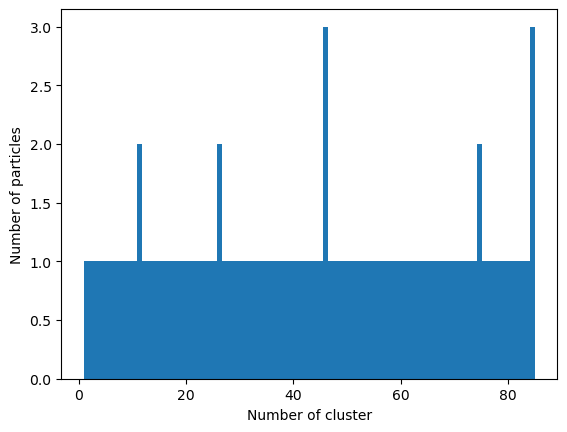

In [67]:
#we can visualize 
plt.hist(Z['Ncluster'],bins=85)
plt.xlabel('Number of cluster')
plt.ylabel('Number of particles')